In [87]:
import numpy as np 
import matplotlib.pyplot as plt
from tqdm import trange
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score,  mean_absolute_error
import seaborn as sns

In [86]:
ls -ltr MCSamples/csvfiles/

total 74296
-rw-r--r--  1 hevjinyarar  staff   551942 Oct 13 03:35 flatTuple_part0_treeN_3_recotaus.csv
-rw-r--r--  1 hevjinyarar  staff    97450 Oct 13 03:35 flatTuple_part0_treeN_3_recomuons.csv
-rw-r--r--  1 hevjinyarar  staff   155453 Oct 13 03:35 flatTuple_part0_treeN_3_gentaus.csv
-rw-r--r--  1 hevjinyarar  staff    57147 Oct 13 03:35 flatTuple_part0_treeN_3_genmuons.csv
-rw-r--r--  1 hevjinyarar  staff   119464 Oct 13 03:35 flatTuple_part0_treeN_3_gentauneutrinos.csv
-rw-r--r--  1 hevjinyarar  staff    59733 Oct 13 03:35 flatTuple_part0_treeN_3_genmuonneutrinos.csv
-rw-r--r--  1 hevjinyarar  staff    94933 Oct 13 03:36 flatTuple_part0_treeN_3_hists.png
-rw-r--r--  1 hevjinyarar  staff  1812374 Oct 13 03:38 flatTuple_part0_treeN_3_pairgrid.png
-rw-r--r--  1 hevjinyarar  staff   437500 Oct 13 03:41 flatTuple_part0_treeN_2_recotaus.csv
-rw-r--r--  1 hevjinyarar  staff    77182 Oct 13 03:41 flatTuple_part0_treeN_2_recomuons.csv
-rw-r--r--  1 hevjinyarar  staff   122954 Oct 13 03:41 

In [88]:
data = pd.read_csv("MCSamples/csvfiles/MC_recotaus.csv")
gendata = pd.read_csv("MCSamples/csvfiles/MC_gentaus.csv")
dataMuons = pd.read_csv("MCSamples/csvfiles/MC_recomuons.csv")
genMuons = pd.read_csv("MCSamples/csvfiles/MC_genmuons.csv")
gendatamuonNeutrinos = pd.read_csv("MCSamples/csvfiles/MC_genmuonneutrinos.csv")
gendatatauNeutrinos = pd.read_csv("MCSamples/csvfiles/MC_gentauneutrinos.csv")


In [89]:
data

,Unnamed: 0,entry,subentry,label_tau_px,label_tau_py,label_tau_pz,label_tau_abs,tau_px,tau_py,tau_pz,...,BsTauTau_tau_fl3d,BsTauTau_tau_fls3d,BsTauTau_tau_alpha,BsTauTau_tau_vprob,eventID,BsTauTau_gentaupt,label_pt,label_eta,label_phi,file_number
0,0,11,0,-11.788038,-6.555828,16.104155,21.006678,-8.209216,-4.809673,11.551371,...,0.421534,12.996973,0.996980,0.970918,11,9.554754,13.488393,1.012079,-2.634046,0.0
1,1,60,0,0.162037,3.963451,-1.262907,4.162948,-0.321221,2.892424,-0.957565,...,0.083364,7.530805,0.985640,0.666410,60,2.924369,3.966762,-0.313225,1.529936,0.0
2,2,66,0,4.472068,-8.427861,-4.548322,10.569555,2.375849,-4.293860,-2.092270,...,0.101656,8.105702,0.979610,0.292443,66,4.921455,9.540873,-0.460293,-1.082947,0.0
3,3,135,0,4.243146,-3.215523,-7.536881,9.227592,3.908763,-2.411756,-6.459907,...,0.402799,18.092627,0.962620,0.737935,135,4.596218,5.323897,-1.147056,-0.648484,0.0
4,4,147,0,-3.557540,-12.237202,-6.320212,14.224987,-1.856974,-7.924614,-4.175698,...,0.396051,22.607199,0.996799,0.921039,147,8.131434,12.743830,-0.477580,-1.853713,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12832,583,22486,0,1.324028,-29.114489,33.670480,44.532097,0.248660,-9.313651,10.288762,...,0.431222,9.162552,0.977615,0.783822,22486,9.373325,29.144579,0.987034,-1.525351,19.0
12833,584,22608,0,-0.131475,4.870125,5.001573,6.982201,-0.403766,3.883252,4.518555,...,0.206911,11.906222,0.967955,0.578903,22608,3.831998,4.871899,0.900070,1.597786,19.0
12834,585,22709,0,3.984467,5.342852,-6.626698,9.398679,3.180289,3.713932,-5.281202,...,0.273745,7.742959,0.990314,0.606934,22709,4.911545,6.664987,-0.877306,0.930017,19.0
12835,586,22769,0,5.904522,-11.321654,-9.672960,16.019032,4.225609,-8.936357,-7.700234,...,0.207682,10.363133,0.997222,0.408060,22769,9.887549,12.768838,-0.699172,-1.090078,19.0


Text(0.5, 1.0, '3-prong decaying tau $\\phi$')

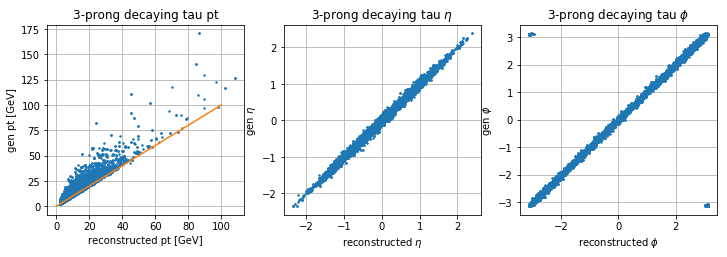

In [90]:
plt.rcParams['figure.figsize'] = [12, 3.5]
fig, (ax0,ax1,ax2) = plt.subplots(1,3)
ax0.plot(data.BsTauTau_tau_pt.values, gendata[gendata.muondecay == False].genParticle_pt.values, '.', markersize = 3)
ax0.plot([0,100], [0,100])
ax0.grid()
ax0.set_xlabel("reconstructed pt [GeV]")
ax0.set_ylabel("gen pt [GeV]")
ax0.set_title("3-prong decaying tau pt")

ax1.plot(data.BsTauTau_tau_eta.values, gendata[gendata.muondecay == False].genParticle_eta.values, '.', markersize = 3)
#ax1.plot([0,100], [0,100])
ax1.grid()
ax1.set_xlabel("reconstructed $\eta$ ")
ax1.set_ylabel("gen $\eta$ ")
ax1.set_title("3-prong decaying tau $\eta$")

ax2.plot(data.BsTauTau_tau_phi.values, gendata[gendata.muondecay == False].genParticle_phi.values, '.', markersize = 3)
#ax1.plot([0,100], [0,100])
ax2.grid()
ax2.set_xlabel("reconstructed $\phi$ ")
ax2.set_ylabel("gen $\phi$ ")
ax2.set_title("3-prong decaying tau $\phi$")

In [92]:
#data = pd.read_csv("signalrecotaus_multiple.csv")
#gendata = pd.read_csv("signalgentaus_multiple.csv")
#data = pd.read_csv("signalrecotaus_15_07.csv")
#gendata = pd.read_csv("signalgentaus_15_07.csv")

#data = pd.read_csv("signalrecotaus-part9_part5.csv")
#gendata = pd.read_csv("signalgentaus-part9_part5.csv")
#data = data.drop(columns = ['BsTauTau_tau_dr1', 'BsTauTau_tau_dr2', 'BsTauTau_tau_dr3','BsTauTau_tau_ptres1', 'BsTauTau_tau_ptres2', 'BsTauTau_tau_ptres3'])
#full_labels = data[['BsTauTau_tau_pt', 'BsTauTau_tau_eta', 'BsTauTau_tau_phi',
#                         'label_tau_px', 'label_tau_py','label_tau_pz', 'label_tau_abs' ]]
target_labels = data[['BsTauTau_tau_pt', 'BsTauTau_tau_eta', 'BsTauTau_tau_phi']] # this is switched to gen later
data = data.drop(columns=['BsTauTau_tau_pt', 'BsTauTau_tau_eta', 'BsTauTau_tau_phi',
                         'label_tau_px', 'label_tau_py','label_tau_pz', 'label_tau_abs',
                         'pi1_px', 'pi1_py', 'pi1_pz', 'pi2_px', 'pi2_py', 'pi2_pz', 'pi3_px',
                         'pi3_py', 'pi3_pz', "BsTauTau_gentaupt"])

In [93]:
len(data)

12837

In [94]:
target_labels.BsTauTau_tau_pt = gendata[gendata.muondecay == False].genParticle_pt.values
target_labels.BsTauTau_tau_eta = gendata[gendata.muondecay == False].genParticle_eta.values
target_labels.BsTauTau_tau_phi = gendata[gendata.muondecay == False].genParticle_phi.values

full_labels = target_labels.copy(deep = True)
full_labels2 = full_labels

/Users/hevjinyarar/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [95]:
target_labels

,BsTauTau_tau_pt,BsTauTau_tau_eta,BsTauTau_tau_phi
0,13.488393,1.012079,-2.634046
1,3.966762,-0.313225,1.529936
2,9.540873,-0.460293,-1.082947
3,5.323897,-1.147056,-0.648484
4,12.743830,-0.477580,-1.853713
...,...,...,...
12832,29.144579,0.987034,-1.525351
12833,4.871899,0.900070,1.597786
12834,6.664987,-0.877306,0.930017
12835,12.768838,-0.699172,-1.090078


In [96]:
# order pions by pt
pion_pts = data.loc[:,["BsTauTau_tau_pi1_pt", "BsTauTau_tau_pi2_pt", "BsTauTau_tau_pi3_pt"]]
order_df = pion_pts.apply(lambda x: np.argsort(x)[::-1], axis = 1)
newdata = np.zeros((len(pion_pts),3))
for i,row in enumerate(pion_pts.values):
    order = order_df.values[i,:]
    newrow = np.zeros(3)
    for j,cell in enumerate(row):
        #print(row, cell,order)
        newrow[j] = row[order[j]]
    newdata[i,:] = newrow
newdata = pd.DataFrame(data = newdata, columns= pion_pts.columns)
data.BsTauTau_tau_pi1_pt = newdata.BsTauTau_tau_pi1_pt
data.BsTauTau_tau_pi2_pt = newdata.BsTauTau_tau_pi2_pt
data.BsTauTau_tau_pi3_pt = newdata.BsTauTau_tau_pi3_pt

In [97]:
# order pions by pt
pion_etas = data.loc[:,["BsTauTau_tau_pi1_eta", "BsTauTau_tau_pi2_eta", "BsTauTau_tau_pi3_eta"]]
newdata = np.zeros((len(pion_etas),3))
for i,row in enumerate(pion_etas.values):
    order = order_df.values[i,:]
    newrow = np.zeros(3)
    for j,cell in enumerate(row):
        #print(row, cell,order)
        newrow[j] = row[order[j]]
    newdata[i,:] = newrow
newdata = pd.DataFrame(data = newdata, columns= pion_etas.columns)
data.BsTauTau_tau_pi1_eta = newdata.BsTauTau_tau_pi1_eta
data.BsTauTau_tau_pi2_eta = newdata.BsTauTau_tau_pi2_eta
data.BsTauTau_tau_pi3_eta = newdata.BsTauTau_tau_pi3_eta

In [98]:
# order pions by pt
pion_phis = data.loc[:,["BsTauTau_tau_pi1_phi", "BsTauTau_tau_pi2_phi", "BsTauTau_tau_pi3_phi"]]
newdata = np.zeros((len(pion_phis),3))
for i,row in enumerate(pion_phis.values):
    order = order_df.values[i,:]
    newrow = np.zeros(3)
    for j,cell in enumerate(row):
        #print(row, cell,order)
        newrow[j] = row[order[j]]
    newdata[i,:] = newrow
newdata = pd.DataFrame(data = newdata, columns= pion_phis.columns)
data.BsTauTau_tau_pi1_phi = newdata.BsTauTau_tau_pi1_phi
data.BsTauTau_tau_pi2_phi = newdata.BsTauTau_tau_pi2_phi
data.BsTauTau_tau_pi3_phi = newdata.BsTauTau_tau_pi3_phi

In [99]:
# order pions by pt
pion_dnns = data.loc[:,["BsTauTau_tau_pi1_dnn", "BsTauTau_tau_pi2_dnn", "BsTauTau_tau_pi3_dnn"]]
newdata = np.zeros((len(pion_dnns),3))
for i,row in enumerate(pion_dnns.values):
    order = order_df.values[i,:]
    newrow = np.zeros(3)
    for j,cell in enumerate(row):
        #print(row, cell,order)
        newrow[j] = row[order[j]]
    newdata[i,:] = newrow
newdata = pd.DataFrame(data = newdata, columns= pion_dnns.columns)
data.BsTauTau_tau_pi1_dnn = newdata.BsTauTau_tau_pi1_dnn
data.BsTauTau_tau_pi2_dnn = newdata.BsTauTau_tau_pi2_dnn
data.BsTauTau_tau_pi3_dnn = newdata.BsTauTau_tau_pi3_dnn

In [100]:
data["pi1_logpt"] = np.log(data.BsTauTau_tau_pi1_pt.values)
data["pi2_logpt"] = np.log(data.BsTauTau_tau_pi2_pt.values)
data["pi3_logpt"] = np.log(data.BsTauTau_tau_pi3_pt.values)

In [101]:
oldphi = target_labels.BsTauTau_tau_phi.values

In [102]:
#full_labels["BsTauTau_tau_phi_cos"] = np.cos(full_labels.BsTauTau_tau_phi.values)
#full_labels["BsTauTau_tau_phi_sin"] = np.sin(full_labels.BsTauTau_tau_phi.values)
#full_labels = full_labels.drop(columns=["BsTauTau_tau_phi"])

target_labels["BsTauTau_tau_phi_cos"] = np.cos(target_labels.BsTauTau_tau_phi.values)
target_labels["BsTauTau_tau_phi_sin"] = np.sin(target_labels.BsTauTau_tau_phi.values)
target_labels = target_labels.drop(columns=["BsTauTau_tau_phi"])

/Users/hevjinyarar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/hevjinyarar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
#gendata = pd.read_csv("gentaus.csv")
#gendata = pd.read_csv("signalgentaus_multiple.csv")

In [17]:
#full_labels

In [103]:
data

,Unnamed: 0,entry,subentry,tau_px,tau_py,tau_pz,tau_abs,BsTauTau_tau_pi1_dnn,BsTauTau_tau_pi2_dnn,BsTauTau_tau_pi3_dnn,...,BsTauTau_tau_alpha,BsTauTau_tau_vprob,eventID,label_pt,label_eta,label_phi,file_number,pi1_logpt,pi2_logpt,pi3_logpt
0,0,11,0,-8.209216,-4.809673,11.551371,14.965238,0.998287,0.894200,0.996533,...,0.996980,0.970918,11,13.488393,1.012079,-2.634046,0.0,1.596859,0.930255,0.719173
1,1,60,0,-0.321221,2.892424,-0.957565,3.063696,0.668986,0.632550,0.660951,...,0.985640,0.666410,60,3.966762,-0.313225,1.529936,0.0,0.468538,-0.022717,-0.677643
2,2,66,0,2.375849,-4.293860,-2.092270,5.334744,0.285532,0.838491,0.718785,...,0.979610,0.292443,66,9.540873,-0.460293,-1.082947,0.0,0.690213,0.656852,0.027927
3,3,135,0,3.908763,-2.411756,-6.459907,7.926247,0.999999,0.999997,0.999858,...,0.962620,0.737935,135,5.323897,-1.147056,-0.648484,0.0,0.580053,0.478270,0.250120
4,4,147,0,-1.856974,-7.924614,-4.175698,9.147914,0.691123,0.492340,0.296000,...,0.996799,0.921039,147,12.743830,-0.477580,-1.853713,0.0,1.304949,1.101213,0.397622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12832,583,22486,0,0.248660,-9.313651,10.288762,13.880366,0.999791,0.998798,0.998866,...,0.977615,0.783822,22486,29.144579,0.987034,-1.525351,19.0,1.483910,1.099914,0.647696
12833,584,22608,0,-0.403766,3.883252,4.518555,5.971601,0.988222,0.718116,0.473859,...,0.967955,0.578903,22608,4.871899,0.900070,1.597786,19.0,0.462406,0.231701,0.077033
12834,585,22709,0,3.180289,3.713932,-5.281202,7.197126,0.882515,0.983710,0.994869,...,0.990314,0.606934,22709,6.664987,-0.877306,0.930017,19.0,0.718221,0.476453,0.207395
12835,586,22769,0,4.225609,-8.936357,-7.700234,12.530278,0.541376,0.409247,0.466232,...,0.997222,0.408060,22769,12.768838,-0.699172,-1.090078,19.0,1.656739,1.034768,0.621815


In [104]:
data["BsTauTau_tau_pi1_phi_cos"] = np.cos(data.BsTauTau_tau_pi1_phi.values)
data["BsTauTau_tau_pi1_phi_sin"] = np.sin(data.BsTauTau_tau_pi1_phi.values)
data["BsTauTau_tau_pi2_phi_cos"] = np.cos(data.BsTauTau_tau_pi2_phi.values)
data["BsTauTau_tau_pi2_phi_sin"] = np.sin(data.BsTauTau_tau_pi2_phi.values)
data["BsTauTau_tau_pi3_phi_cos"] = np.cos(data.BsTauTau_tau_pi3_phi.values)
data["BsTauTau_tau_pi3_phi_sin"] = np.sin(data.BsTauTau_tau_pi3_phi.values)

In [105]:
print(data.columns)
data = data.drop(columns=['BsTauTau_tau_matched_gentaupt', 'BsTauTau_tau_matched_ppdgId'])

Index(['Unnamed: 0', 'entry', 'subentry', 'tau_px', 'tau_py', 'tau_pz',
       'tau_abs', 'BsTauTau_tau_pi1_dnn', 'BsTauTau_tau_pi2_dnn',
       'BsTauTau_tau_pi3_dnn', 'BsTauTau_tau_pi1_pt', 'BsTauTau_tau_pi1_eta',
       'BsTauTau_tau_pi1_phi', 'BsTauTau_tau_pi2_pt', 'BsTauTau_tau_pi2_eta',
       'BsTauTau_tau_pi2_phi', 'BsTauTau_tau_pi3_pt', 'BsTauTau_tau_pi3_eta',
       'BsTauTau_tau_pi3_phi', 'BsTauTau_tau_isRight', 'BsTauTau_tau_isRight1',
       'BsTauTau_tau_isRight2', 'BsTauTau_tau_isRight3', 'BsTauTau_tau_dr1',
       'BsTauTau_tau_dr2', 'BsTauTau_tau_dr3', 'BsTauTau_tau_ptres1',
       'BsTauTau_tau_ptres2', 'BsTauTau_tau_ptres3',
       'BsTauTau_tau_matched_gentaupt', 'BsTauTau_tau_matched_ppdgId',
       'BsTauTau_tau_pvips', 'BsTauTau_tau_rhomass1', 'BsTauTau_tau_rhomass2',
       'BsTauTau_tau_q', 'BsTauTau_tau_vx', 'BsTauTau_tau_vy',
       'BsTauTau_tau_vz', 'BsTauTau_tau_max_dr_3prong', 'BsTauTau_tau_lip',
       'BsTauTau_tau_lips', 'BsTauTau_tau_pvip', 'BsTauTau_

In [107]:
data = data.drop(columns = ['label_pt', 'label_eta', 'label_phi' ])

In [108]:
print(data.columns)
#data = data.drop(columns=['eventID', 'BsTauTau_tau_isRight', 'BsTauTau_tau_isRight1',
#       'BsTauTau_tau_isRight2', 'BsTauTau_tau_isRight3'])

Index(['Unnamed: 0', 'entry', 'subentry', 'tau_px', 'tau_py', 'tau_pz',
       'tau_abs', 'BsTauTau_tau_pi1_dnn', 'BsTauTau_tau_pi2_dnn',
       'BsTauTau_tau_pi3_dnn', 'BsTauTau_tau_pi1_pt', 'BsTauTau_tau_pi1_eta',
       'BsTauTau_tau_pi1_phi', 'BsTauTau_tau_pi2_pt', 'BsTauTau_tau_pi2_eta',
       'BsTauTau_tau_pi2_phi', 'BsTauTau_tau_pi3_pt', 'BsTauTau_tau_pi3_eta',
       'BsTauTau_tau_pi3_phi', 'BsTauTau_tau_isRight', 'BsTauTau_tau_isRight1',
       'BsTauTau_tau_isRight2', 'BsTauTau_tau_isRight3', 'BsTauTau_tau_dr1',
       'BsTauTau_tau_dr2', 'BsTauTau_tau_dr3', 'BsTauTau_tau_ptres1',
       'BsTauTau_tau_ptres2', 'BsTauTau_tau_ptres3', 'BsTauTau_tau_pvips',
       'BsTauTau_tau_rhomass1', 'BsTauTau_tau_rhomass2', 'BsTauTau_tau_q',
       'BsTauTau_tau_vx', 'BsTauTau_tau_vy', 'BsTauTau_tau_vz',
       'BsTauTau_tau_max_dr_3prong', 'BsTauTau_tau_lip', 'BsTauTau_tau_lips',
       'BsTauTau_tau_pvip', 'BsTauTau_tau_fl3d', 'BsTauTau_tau_fls3d',
       'BsTauTau_tau_alpha', 'BsTauTau

In [110]:
# final check for duplicates
data.columns
data_small = data[['BsTauTau_tau_pi1_dnn', 'BsTauTau_tau_pi2_dnn', 'BsTauTau_tau_pi3_dnn',
       'BsTauTau_tau_pi1_pt', 'BsTauTau_tau_pi1_eta', 'BsTauTau_tau_pi1_phi',
       'BsTauTau_tau_pi2_pt', 'BsTauTau_tau_pi2_eta', 'BsTauTau_tau_pi2_phi',
       'BsTauTau_tau_pi3_pt', 'BsTauTau_tau_pi3_eta', 'BsTauTau_tau_pi3_phi']]
indic = data_small.drop_duplicates(keep = "first").index.values
print(indic)
data_small = data.iloc[indic,:]
target_labels_small = target_labels.iloc[indic]
print(len(data_small), len(data_small.drop_duplicates(keep = "first")))

[    0     1     2 ... 12834 12835 12836]
7417 7417


In [111]:
indices = np.arange(len(data_small))
X_train, X_test, y_train, y_test, index_train, index_test = train_test_split(data_small, target_labels_small,indices, test_size=0.5, shuffle = True, random_state=42)

In [112]:
"""
def scale_features_target(data,target_labels):
    scaler_features = StandardScaler()
    scaler_features.fit(data.values)
    data = pd.DataFrame(scaler_features.transform(data.values), columns=data.columns, index=data.index)
    
    scaler_targets = StandardScaler()
    scaler_targets.fit(target_labels)
    target_labels = pd.DataFrame(scaler_targets.transform(target_labels.values), columns=target_labels.columns, index=target_labels.index) 
    return data, target_labels, scaler_features, scaler_targets


data, target_labels, scaler_features, scaler_targets = scale_features_target(data,target_labels)
"""


def scale_features_target(X_train, X_test, y_train, y_test):
    scaler_features = StandardScaler()
    scaler_features.fit(X_train.values)
    X_train = pd.DataFrame(scaler_features.transform(X_train.values), columns=X_train.columns, index=X_train.index)
    X_test = pd.DataFrame(scaler_features.transform(X_test.values), columns=X_test.columns, index=X_test.index)
    
    scaler_targets = StandardScaler()
    scaler_targets.fit(y_train)
    y_train = pd.DataFrame(scaler_targets.transform(y_train.values), columns=y_train.columns, index=y_train.index) 
    y_test = pd.DataFrame(scaler_targets.transform(y_test.values), columns=y_test.columns, index=y_test.index) 
    return X_train, X_test, y_train, y_test, scaler_features, scaler_targets

X_train, X_test, y_train, y_test, scaler_features, scaler_targets = scale_features_target(X_train, X_test, y_train, y_test)



"""
#try robustscaler for tau - pt
def scale_features_target(data,target_labels):
    
    scaler_features = StandardScaler()
    scaler_features.fit(data.values)
    data = pd.DataFrame(scaler_features.transform(data.values), columns=data.columns, index=data.index)
    
    scaler_target_pt = RobustScaler(with_centering=False, quantile_range=(0.1, 25.0))
    scaler_target_pt.fit(target_labels.BsTauTau_tau_pt.values.reshape(-1,1))
    new_pt = scaler_target_pt.transform(target_labels.BsTauTau_tau_pt.values.reshape(-1,1))
    
    scaler_targets = StandardScaler()
    target_labels = target_labels.drop(columns = ["BsTauTau_tau_pt"])
    scaler_targets.fit(target_labels)
    target_labels = pd.DataFrame(np.hstack([new_pt, scaler_targets.transform(target_labels.values)]),
                                 columns=["BsTauTau_tau_pt", "BsTauTau_tau_eta","BsTauTau_tau_phi_cos","BsTauTau_tau_phi_sin"],
                                 index=target_labels.index)   
    return data, target_labels, scaler_features,scaler_pt, scaler_targets


data, target_labels, scaler_features, scaler_pt, scaler_targets = scale_features_target(data,target_labels)
""";

/Users/hevjinyarar/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/hevjinyarar/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/hevjinyarar/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [25]:
#indices = np.arange(len(data))
#X_train, X_test, y_train, y_test, index_train, index_test = train_test_split(data, target_labels,indices, test_size=0.3, shuffle = True, random_state=42)

(array([340., 391., 352., 370., 423., 328., 308., 399., 441., 356.]),
 array([-1.75267113, -1.40679441, -1.06091769, -0.71504097, -0.36916425,
        -0.02328753,  0.32258919,  0.66846591,  1.01434263,  1.36021935,
         1.70609607]),
 <a list of 10 Patch objects>)

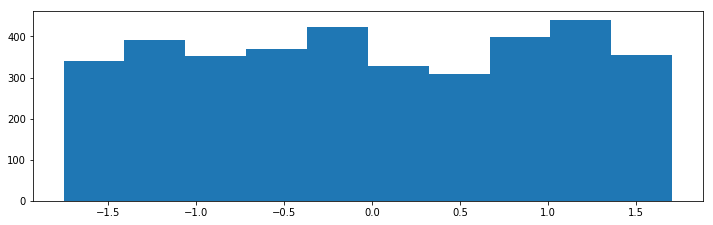

In [113]:
plt.hist(X_train.BsTauTau_tau_pi3_phi)

In [115]:
#from catboost import Pool
#train_data = Pool(data=X_train, label=y_train, weight=pt_weight)

In [117]:
def train_on_cpu():  
    model = CatBoostRegressor(iterations=10000,  learning_rate=0.03 ,  objective="MultiRMSE")
    model.fit(X_train, y_train,   eval_set=(X_test, y_test),   verbose=2500 )
    return model

model = train_on_cpu()

0:	learn: 1.9575976	test: 1.9426906	best: 1.9426906 (0)	total: 68.4ms	remaining: 11m 23s
2500:	learn: 0.1257439	test: 0.3652304	best: 0.3648859 (1818)	total: 1m 16s	remaining: 3m 49s
5000:	learn: 0.0583232	test: 0.3659063	best: 0.3648859 (1818)	total: 2m 33s	remaining: 2m 33s
7500:	learn: 0.0292192	test: 0.3664039	best: 0.3648859 (1818)	total: 3m 47s	remaining: 1m 15s
9999:	learn: 0.0154424	test: 0.3665579	best: 0.3648859 (1818)	total: 5m 33s	remaining: 0us

bestTest = 0.3648859128
bestIteration = 1818

Shrink model to first 1819 iterations.


In [118]:
def grid_search():  
    model = CatBoostRegressor(iterations=10000 , objective="MultiRMSE")
    grid = {'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.09,  0.12],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}  
    grid_search_result = model.grid_search(grid, 
                                       X=X_train, 
                                       y=y_train, 
                                       plot=True)
    #model.fit(X_train, y_train,   eval_set=(X_test, y_test),   verbose=10000 )
    return model

#grid_search()

In [119]:
preds = model.predict(X_test)
#descale
#preds_descaled = scaler_targets.inverse_transform(preds)
#preds_df = pd.DataFrame(columns=["pred_pt","pred_eta","pred_phi"], data = preds_descaled)
preds_descaled = scaler_targets.inverse_transform(preds)
preds_df = pd.DataFrame(columns=["pred_pt","pred_eta","pred_phi_sin","pred_phi_cos"], data = preds_descaled)
new_phi = np.arctan2(preds_descaled[:,3],preds_descaled[:,2])
#new_phi = np.arctan2(preds[:,2],preds[:,3])
new_phi
#preds_df.hist(bins = 50, layout = (1,3), figsize = (6,2) );
#full_labels.iloc[index_test,:3].hist(bins = 50, layout = (1,3), figsize = (6,2) );

"""
preds = model.predict(X_test)
#descale
preds_pt = scaler_pt.inverse_transform(preds[:,0].reshape(-1,1))
preds_descaled = scaler_targets.inverse_transform(preds[:,1:])
preds_df = pd.DataFrame(columns=["pred_pt","pred_eta","pred_phi_sin","pred_phi_cos"], data = np.hstack([preds_pt, preds_descaled]))
new_phi = np.arctan2(preds_descaled[:,2],preds_descaled[:,1])
#new_phi = np.arctan2(preds[:,2],preds[:,3])
new_phi
#preds_df.hist(bins = 50, layout = (1,3), figsize = (6,2) );
#full_labels.iloc[index_test,:3].hist(bins = 50, layout = (1,3), figsize = (6,2) );
""";

In [120]:
preds

array([[-0.59109673, -0.65936115, -1.16269089,  0.77320114],
       [-0.08581983, -0.19340679,  1.28012902, -0.65821224],
       [-0.0709692 , -0.49694958,  1.4082232 ,  0.27751762],
       ...,
       [ 0.68650625,  0.16223558,  1.15910245, -0.88155534],
       [-0.74325436, -0.62043636,  1.21665825,  0.72579534],
       [-0.62741828, -0.48684007, -1.10225892,  0.80917803]])

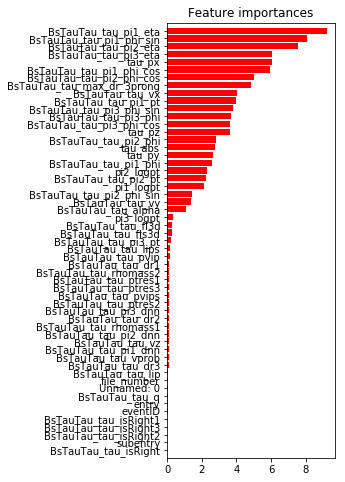

In [124]:
# Plot the feature importances 
importances = model.get_feature_importance()
index = np.argsort(importances)
importances = importances[index]
indices = list(data.columns)
indices = np.asarray(indices)[index]

plt.figure()
plt.rcParams['figure.figsize'] = [3, 8]
plt.title("Feature importances")
plt.barh(range(importances.shape[0]), importances, color="r", align="center")
plt.yticks(range(importances.shape[0]), indices)
plt.ylim([-1, importances.shape[0]])
#plt.show()
plt.savefig("feats1.png")

In [125]:
preds

array([[-0.59109673, -0.65936115, -1.16269089,  0.77320114],
       [-0.08581983, -0.19340679,  1.28012902, -0.65821224],
       [-0.0709692 , -0.49694958,  1.4082232 ,  0.27751762],
       ...,
       [ 0.68650625,  0.16223558,  1.15910245, -0.88155534],
       [-0.74325436, -0.62043636,  1.21665825,  0.72579534],
       [-0.62741828, -0.48684007, -1.10225892,  0.80917803]])

In [126]:
y_test

,BsTauTau_tau_pt,BsTauTau_tau_eta,BsTauTau_tau_phi_cos,BsTauTau_tau_phi_sin
9034,-0.637736,-0.761242,-1.214503,0.702966
8107,0.320524,-0.145305,1.233689,-0.738149
7246,-0.135462,-0.519703,1.422276,0.233292
3129,-0.357322,0.150626,0.017456,1.395164
1442,-0.911148,0.279762,1.043779,-0.979540
...,...,...,...,...
2993,1.586193,-0.927053,0.906798,-1.102123
3064,0.119589,-0.435468,1.175703,-0.824020
4949,0.873254,0.075651,1.211596,-0.772503
532,-0.875824,-0.726845,1.225138,0.738299


In [127]:
print("scaled: ")
print(mean_squared_error(y_test, preds), r2_score(y_test, preds, multioutput = "uniform_average") , explained_variance_score(y_test, preds),  mean_absolute_error(y_test, preds))
print("descaled:" )
#relevant_labels = full_labels.loc[:,["BsTauTau_tau_pt", "BsTauTau_tau_eta", "BsTauTau_tau_phi_sin","BsTauTau_tau_phi_cos"]]
#print(relevant_labels)
#print(mean_squared_error(relevant_labels.iloc[index_test], preds_df),  r2_score(relevant_labels.iloc[index_test], preds_df, multioutput = "uniform_average"), explained_variance_score(full_labels.iloc[index_test,:3], preds_df),  mean_absolute_error(full_labels.iloc[index_test,:3], preds_df))

scaled: 
0.03328543214189701 0.9658413305428308 0.9658513726233485 0.0927501963733817
descaled:


In [128]:
target_labels_small

,BsTauTau_tau_pt,BsTauTau_tau_eta,BsTauTau_tau_phi_cos,BsTauTau_tau_phi_sin
0,13.488393,1.012079,-0.873939,-0.486035
1,3.966762,-0.313225,0.040849,0.999165
2,9.540873,-0.460293,0.468727,-0.883343
3,5.323897,-1.147056,0.797000,-0.603979
4,12.743830,-0.477580,-0.279158,-0.960245
...,...,...,...,...
12247,29.144579,0.987034,0.045430,-0.998968
12248,4.871899,0.900070,-0.026986,0.999636
12834,6.664987,-0.877306,0.597821,0.801630
12835,12.768838,-0.699172,0.462417,-0.886663


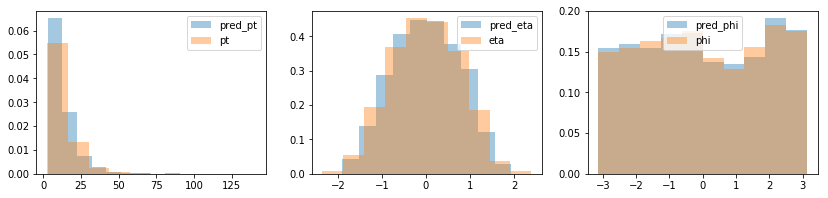

In [130]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3)
plt.rcParams['figure.figsize'] = [14, 3]
plt.rcParams['figure.figsize'] = [14, 3]
ax1.hist(preds_df.iloc[:,0], density= True, alpha = 0.4, label="pred_pt")
ax1.hist(target_labels_small.iloc[index_test,0], density= True, alpha = 0.4, label="pt");
ax1.legend();

ax2.hist(preds_df.iloc[:,1], density= True, alpha = 0.4, label="pred_eta")
ax2.hist(target_labels_small.iloc[index_test,1], density= True, alpha = 0.4, label="eta");
ax2.legend();

#ax3.hist(preds_df.iloc[:,2], density= True, alpha = 0.4, label="pred_phi")
ax3.hist(new_phi, density= True, alpha = 0.4, label="pred_phi")
#ax3.hist(full_labels.iloc[index_test,], density= True, alpha = 0.4, label="phi");
ax3.hist(oldphi[indic][index_test], density= True, alpha = 0.4, label="phi");
ax3.legend();

In [40]:
#model.save_model("eta_phi_scaled.cbm")

In [131]:
target_labels_small.iloc[index_test,0], preds_df

(9034     6.458492
 8107    16.647705
 7246    11.799185
 3129     9.440141
 1442     3.551286
           ...    
 2993    30.105610
 3064    14.511154
 4949    22.524906
 532      3.926894
 3054     4.747483
 Name: BsTauTau_tau_pt, Length: 3709, dtype: float64,
         pred_pt  pred_eta  pred_phi_sin  pred_phi_cos
 0      6.954408 -0.497877     -0.826092      0.556333
 1     12.327037 -0.134877      0.885632     -0.464742
 2     12.484944 -0.371351      0.975390      0.202745
 3     10.379906  0.134201     -0.022723      0.996181
 4      5.614604  0.284283      0.711761     -0.712624
 ...         ...       ...           ...           ...
 3704  34.622575 -0.688970      0.619661     -0.760611
 3705  10.670506 -0.347666      0.827549     -0.564952
 3706  20.539210  0.142186      0.800827     -0.624060
 3707   5.336510 -0.467553      0.841157      0.522517
 3708   6.568199 -0.363475     -0.783746      0.581996
 
 [3709 rows x 4 columns])

# 2D scatter plots

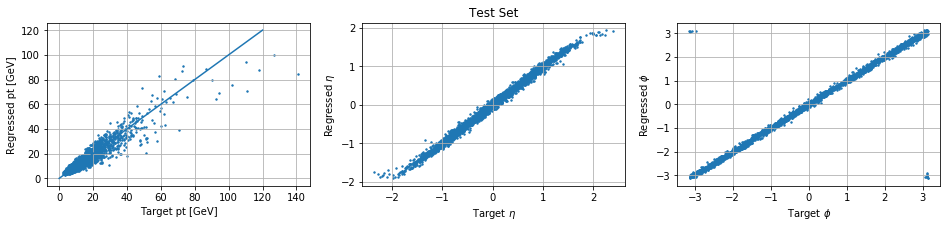

In [134]:
plt.rcParams['figure.figsize'] = [16, 3]
fig, (ax0,ax1,ax2) = plt.subplots(1,3)
ax0.scatter(target_labels_small.iloc[index_test,0], preds_df.iloc[:,0], s = 2); ax0.set_xlabel("Target pt [GeV]") ; ax0.set_ylabel("Regressed pt [GeV]");
ax0.grid(); ax1.grid(); ax2.grid();
ax0.plot([0,120],[0,120])
ax1.scatter(target_labels_small.iloc[index_test,1], preds_df.iloc[:,1], s = 2);
ax1.set_title("Test Set");  ax1.set_xlabel(r'Target $\eta$') ; ax1.set_ylabel("Regressed $\eta$");
#ax2.scatter(full_labels.iloc[index_test,2], preds_df.iloc[:,2], s = 2); ax2.set_xlabel("Target phi") ; ax2.set_ylabel("Regressed phi");
ax2.scatter(oldphi[indic][index_test], new_phi, s = 2); ax2.set_xlabel("Target $\phi$") ; ax2.set_ylabel("Regressed $\phi$")
plt.savefig("2D-ScatterPlot.png")

In [135]:
len(preds)

3709

# Profile plots

In [136]:
np.hstack([preds_descaled[:,:2], new_phi.reshape(-1,1)])

array([[ 6.95440781, -0.49787733,  2.54890763],
       [12.32703673, -0.13487672, -0.48325696],
       [12.48494402, -0.37135099,  0.20494245],
       ...,
       [20.53920981,  0.14218561, -0.66197227],
       [ 5.33650989, -0.46755307,  0.5558535 ],
       [ 6.56819938, -0.3634752 ,  2.50285566]])

In [137]:
full_labels.columns

Index(['BsTauTau_tau_pt', 'BsTauTau_tau_eta', 'BsTauTau_tau_phi'], dtype='object')

[ 2.54890763 -0.48325696  0.20494245 ... -0.66197227  0.5558535
  2.50285566]


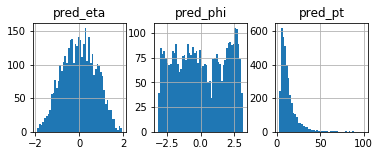

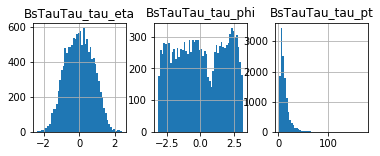

In [138]:
# predict only test for now 
#scaled_data = scaler_features.transform(data_small) # SWITCH
preds = model.predict(X_test)# scaled_data)
#descale
preds_descaled = scaler_targets.inverse_transform(preds)
new_phi = np.arctan2(preds_descaled[:,3],preds_descaled[:,2])
print(new_phi)
preds_df = pd.DataFrame(columns=["pred_pt","pred_eta","pred_phi"], data = np.hstack([preds_descaled[:,:2], new_phi.reshape(-1,1)]))
#preds_df
preds_df.hist(bins = 50, layout = (1,3), figsize = (6,2) );
full_labels2.loc[:,["BsTauTau_tau_pt","BsTauTau_tau_eta","BsTauTau_tau_phi"]].hist(bins = 50, layout = (1,3), figsize = (6,2) );

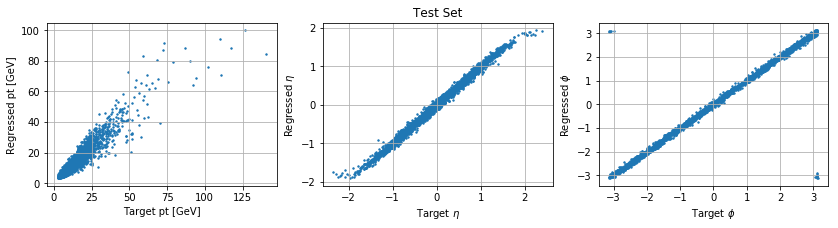

In [140]:
plt.rcParams['figure.figsize'] = [14, 3]
fig, (ax0,ax1,ax2) = plt.subplots(1,3)
ax0.scatter(target_labels_small.iloc[index_test,0], preds_df.iloc[:,0], s = 2); ax0.set_xlabel("Target pt [GeV]") ; ax0.set_ylabel("Regressed pt [GeV]");
ax0.grid(); ax1.grid(); ax2.grid();
ax1.scatter(target_labels_small.iloc[index_test,1], preds_df.iloc[:,1], s = 2);
ax1.set_title("Test Set");  ax1.set_xlabel(r'Target $\eta$') ; ax1.set_ylabel("Regressed $\eta$");
#ax2.scatter(full_labels.iloc[index_test,2], preds_df.iloc[:,2], s = 2); ax2.set_xlabel("Target phi") ; ax2.set_ylabel("Regressed phi");
ax2.scatter(oldphi[indic][index_test], new_phi, s = 2); ax2.set_xlabel("Target $\phi$") ; ax2.set_ylabel("Regressed $\phi$")
plt.savefig("2D-ScatterPlot.png")

In [141]:
targets = pd.DataFrame(data = np.hstack([target_labels_small.iloc[index_test,:2].values, oldphi[indic][index_test].reshape(-1,1)]), columns = ['BsTauTau_tau_pt', 'BsTauTau_tau_eta', 'BsTauTau_tau_phi'])
preds = preds_df.iloc[:,:3]
residuals = targets - preds.values#[indic]
residuals.columns = ['BsTauTau_tau_pt_res', 'BsTauTau_tau_eta_res', 'BsTauTau_tau_phi_res']
residuals_df = pd.concat((residuals.reset_index(), targets.reset_index()), axis=1)
residuals2 = pd.eval("abs(residuals)")
residuals2.columns = ['BsTauTau_tau_pt_res_abs', 'BsTauTau_tau_eta_res_abs', 'BsTauTau_tau_phi_res_abs']
residuals2_df = pd.concat((residuals2.reset_index(), targets.reset_index()), axis=1)

In [142]:
residuals['BsTauTau_tau_pt'] = targets['BsTauTau_tau_pt']
residuals['BsTauTau_tau_eta'] = targets['BsTauTau_tau_eta']
residuals['BsTauTau_tau_phi'] = targets['BsTauTau_tau_phi']

residuals2['BsTauTau_tau_pt'] = targets['BsTauTau_tau_pt']
residuals2['BsTauTau_tau_eta'] = targets['BsTauTau_tau_eta']
residuals2['BsTauTau_tau_phi'] = targets['BsTauTau_tau_phi']

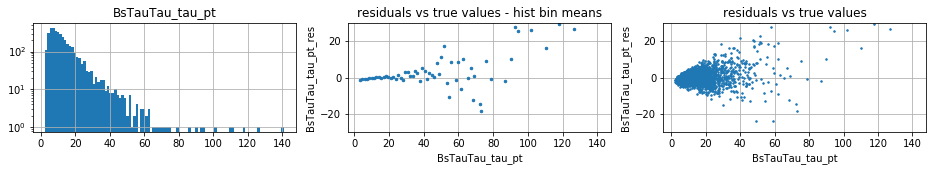

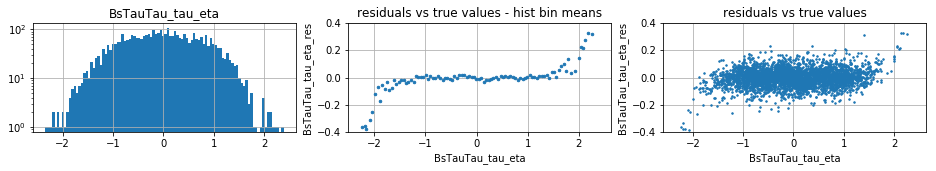

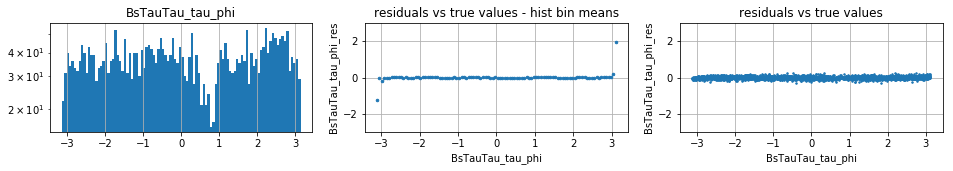

In [143]:
def profile_plot(df, feature, feature_res, lim, nbins = 100):
    plt.rcParams['figure.figsize'] = [16, 2]
    fig, (ax0,ax1,ax2) = plt.subplots(1,3)
    histogram = ax0.hist(df[feature], bins = nbins, log = True)
    ax0.set_title(feature)
    histogram_edges = histogram[1]
    means, res_vals = [],[]
    for idx, edge in enumerate(histogram_edges[:-1]):
        mask = (df[feature].values > edge) & (df[feature].values <= histogram_edges[idx+1])
        true_mean = df[feature][mask].mean()
        #true_mean = (edge + histogram_edges[idx+1])/2.
        res_val = df[feature_res][mask].mean()
        means.append(true_mean)
        res_vals.append(res_val)
    means = np.asarray(means)
    res_vals = (np.asarray(res_vals))
    ax1.plot(means,res_vals, '.', markersize = 5)
    ax1.set_title("residuals vs true values - hist bin means")
    ax1.set_xlabel(feature);ax1.set_ylabel(feature_res);
    ax2.plot(df[feature], df[feature_res], '.', markersize = 3)
    ax2.set_title("residuals vs true values")
    ax2.set_xlabel(feature); ax2.set_ylabel(feature_res);
    ax0.grid(); ax1.grid(); ax2.grid();
    ax1.set_ylim(-lim,lim)
    ax2.set_ylim(-lim,lim)
    return
 
profile_plot(residuals, "BsTauTau_tau_pt", "BsTauTau_tau_pt_res", 30)
plt.savefig("profile1.png")
profile_plot(residuals, "BsTauTau_tau_eta", "BsTauTau_tau_eta_res", 0.4)
plt.savefig("profile2.png")
profile_plot(residuals, "BsTauTau_tau_phi", "BsTauTau_tau_phi_res", 3)
plt.savefig("profile3.png")

In [153]:
#data, full_labels, preds

In [145]:
#othertaus = pd.read_csv("other_taus.csv")
#othertaus.columns = ["index", "genParticle_pt", "genParticle_eta", "genParticle_phi"]

In [154]:
othertaus = gendata[gendata.muondecay == True]
othertaus = othertaus.iloc[indic,:].iloc[index_test,:]

In [155]:
energy = lambda m, p: (m**2 + p**2) ** 0.5
p_abs = lambda pt, eta: pt * np.cosh(eta)
m_tau = 1.77686 # GeV
othertaus["energy"] = energy(m_tau, p_abs(othertaus.genParticle_pt, othertaus.genParticle_eta))
othertaus.energy

18069    13.510272
16215    18.946233
14493    26.591403
6259     12.568230
2885     25.568080
           ...    
5987     23.974004
6129     16.064976
9899     16.392524
1065     20.080449
6109     14.891087
Name: energy, Length: 3709, dtype: float64

In [156]:
taus = gendata[gendata.muondecay == False]
taus =  taus.iloc[indic,:].iloc[index_test,:]

In [157]:
preds

,pred_pt,pred_eta,pred_phi
0,6.954408,-0.497877,2.548908
1,12.327037,-0.134877,-0.483257
2,12.484944,-0.371351,0.204942
3,10.379906,0.134201,1.593602
4,5.614604,0.284283,-0.786004
...,...,...,...
3704,34.622575,-0.688970,-0.887163
3705,10.670506,-0.347666,-0.599008
3706,20.539210,0.142186,-0.661972
3707,5.336510,-0.467553,0.555853


In [158]:
taus["energy_with_regressed_p_eta"] = energy(m_tau, p_abs(preds.pred_pt, preds.pred_eta).values)
taus.energy_with_regressed_p_eta

18068     8.033270
16214    12.565596
14492    13.473408
6258     10.623172
2884      6.107212
           ...    
5986     43.206679
6128     11.460492
9898     20.823127
1064      6.190976
6108      7.228659
Name: energy_with_regressed_p_eta, Length: 3709, dtype: float64

In [159]:
preds

,pred_pt,pred_eta,pred_phi
0,6.954408,-0.497877,2.548908
1,12.327037,-0.134877,-0.483257
2,12.484944,-0.371351,0.204942
3,10.379906,0.134201,1.593602
4,5.614604,0.284283,-0.786004
...,...,...,...
3704,34.622575,-0.688970,-0.887163
3705,10.670506,-0.347666,-0.599008
3706,20.539210,0.142186,-0.661972
3707,5.336510,-0.467553,0.555853


In [160]:
preds

preds.insert(3, "pred_tau_px", pd.eval("preds.pred_pt * cos(preds.pred_phi) "))
preds.insert(4, "pred_tau_py", pd.eval("preds.pred_pt * sin(preds.pred_phi) "))
preds.insert(5, "pred_tau_pz", pd.eval("preds.pred_pt * sinh(preds.pred_eta) "))

In [161]:
othertaus

othertaus.insert(3, "tau_px", pd.eval("othertaus.genParticle_pt * cos(othertaus.genParticle_phi) "))
othertaus.insert(4, "tau_py", pd.eval("othertaus.genParticle_pt * sin(othertaus.genParticle_phi) "))
othertaus.insert(5, "tau_pz", pd.eval("othertaus.genParticle_pt * sinh(othertaus.genParticle_eta) "))

In [162]:
vector_prod_p1_p2 = lambda p1x,p1y,p1z,p2x,p2y,p2z: p1x.values * p2x.values + p1y.values * p2y.values + p1z.values * p2z.values

In [163]:
ppp = vector_prod_p1_p2(preds.pred_tau_px, preds.pred_tau_py, preds.pred_tau_pz, othertaus.tau_px, othertaus.tau_py, othertaus.tau_pz )

In [164]:
inv_mass = (2 * m_tau**2 + 2 * (othertaus.energy.values * taus.energy_with_regressed_p_eta.values - ppp)) ** 0.5

In [165]:
inv_mass

array([5.99849158, 5.27973899, 5.89652295, ..., 4.15343777, 5.30657033,
       4.35805593])

Text(0.5, 1.0, 'Bs mass')

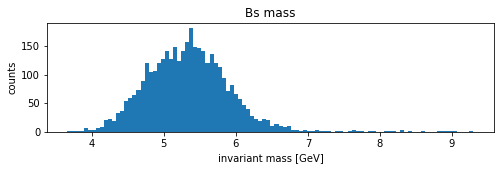

In [181]:
plt.rcParams['figure.figsize'] = [8, 2]
plt.hist(inv_mass[inv_mass < 10], log = False, bins= 100)
plt.xlabel("invariant mass [GeV]")
plt.ylabel("counts");
plt.title("Bs mass")
#plt.xlim(3,15)

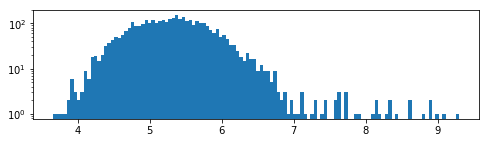

In [183]:
plt.rcParams['figure.figsize'] = [8, 2]
hist = plt.hist(inv_mass[inv_mass < 10 ], log = True, bins= 120)

In [184]:
a = hist[0]; b = hist[1]
means = (b[:-1] + b[1:])/2
mean = sum(a*means)/len(inv_mass)
mean

5.328125814064752

In [185]:
sigma = (sum((means - mean)**2)/len(inv_mass))**0.5
sigma

0.3583139012812315

In [186]:
np.std(inv_mass)

0.9141003566560524

In [187]:
np.mean(inv_mass)

5.368571819859096